In [1]:
import os
os.chdir("..")

In [2]:
import gym

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from lib import dqn_model
import utils
import envs

/home/sizheree/.conda/envs/car-racing/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
OBSERVATION_SHAPE = (4,96,96)
ACTIONSPACE_SIZE = 5
REPLAY_SIZE = 10000

### 随机策略 (on cpu)

In [4]:
env = envs.GoodWrapper(gym.make('CarRacing-v2',continuous=False, render_mode="rgb_array"))
net = dqn_model.DQN(OBSERVATION_SHAPE, ACTIONSPACE_SIZE)
tgt_net = dqn_model.DQN(OBSERVATION_SHAPE, ACTIONSPACE_SIZE)
buffer = utils.ExperienceBuffer(REPLAY_SIZE)
agent = envs.Agent(env, buffer)

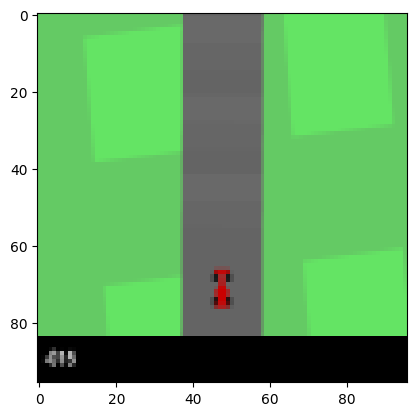

In [5]:
agent._reset()
img = plt.imshow(env.debug_img) # only call this once
# 运行 50 playstep
for _ in range(50):
    agent.play_step(net)
    img.set_data(env.debug_img)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

### 训好的模型

In [6]:
env = envs.GoodWrapper(gym.make('CarRacing-v2',continuous=False, render_mode="rgb_array"))
net = dqn_model.DQN(OBSERVATION_SHAPE, ACTIONSPACE_SIZE)
tgt_net = dqn_model.DQN(OBSERVATION_SHAPE, ACTIONSPACE_SIZE)
buffer = utils.ExperienceBuffer(REPLAY_SIZE)
agent = envs.Agent(env, buffer)

In [7]:
checkpoint = torch.load('models/CarRacing-v2-best_tar.dat')
net.load_state_dict(checkpoint)
tgt_net.load_state_dict(checkpoint)

<All keys matched successfully>

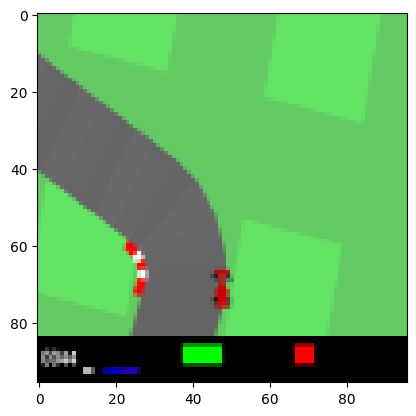

In [8]:
agent._reset()
img = plt.imshow(env.debug_img) # only call this once
# 运行 200 playstep
for _ in range(200): 
    agent.play_step(net)
    img.set_data(env.debug_img)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)